<a href="https://colab.research.google.com/github/syt73/python/blob/main/pythonbasic11_Machine_Learning_%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1. 문  제 파  악 - 배경 이해, 분석 목표 설정, 분석 일정, 데이터 확보

# G 드라이브 연결
from google.colab import drive
drive.mount('/gdrive/')

Mounted at /gdrive/


In [ ]:
# 모듈 설정
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


# https://dacon.io/competitions/open/235539/data

train = pd.read_csv('/gdrive/My Drive/Colab Notebooks/titanic/train.csv')
test = pd.read_csv('/gdrive/My Drive/Colab Notebooks/titanic/test.csv')
submission = pd.read_csv('/gdrive/My Drive/Colab Notebooks/titanic/submission.csv')

In [ ]:
# 2. 데이터   탐색 - 결측치/이상치 파악, 데이터 분포, 상관 관계 , 그림

print(train.shape)
print(test.shape)
print(submission.shape)

(891, 12)
(418, 11)
(418, 2)


In [ ]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [ ]:
# 통계 정보 요약
train.describe()

# 기본적으로는 숫자 데이터 열만 요약

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
train.describe(include='all') # 문자를 포함한 모든 열의 요약 통계 정보

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


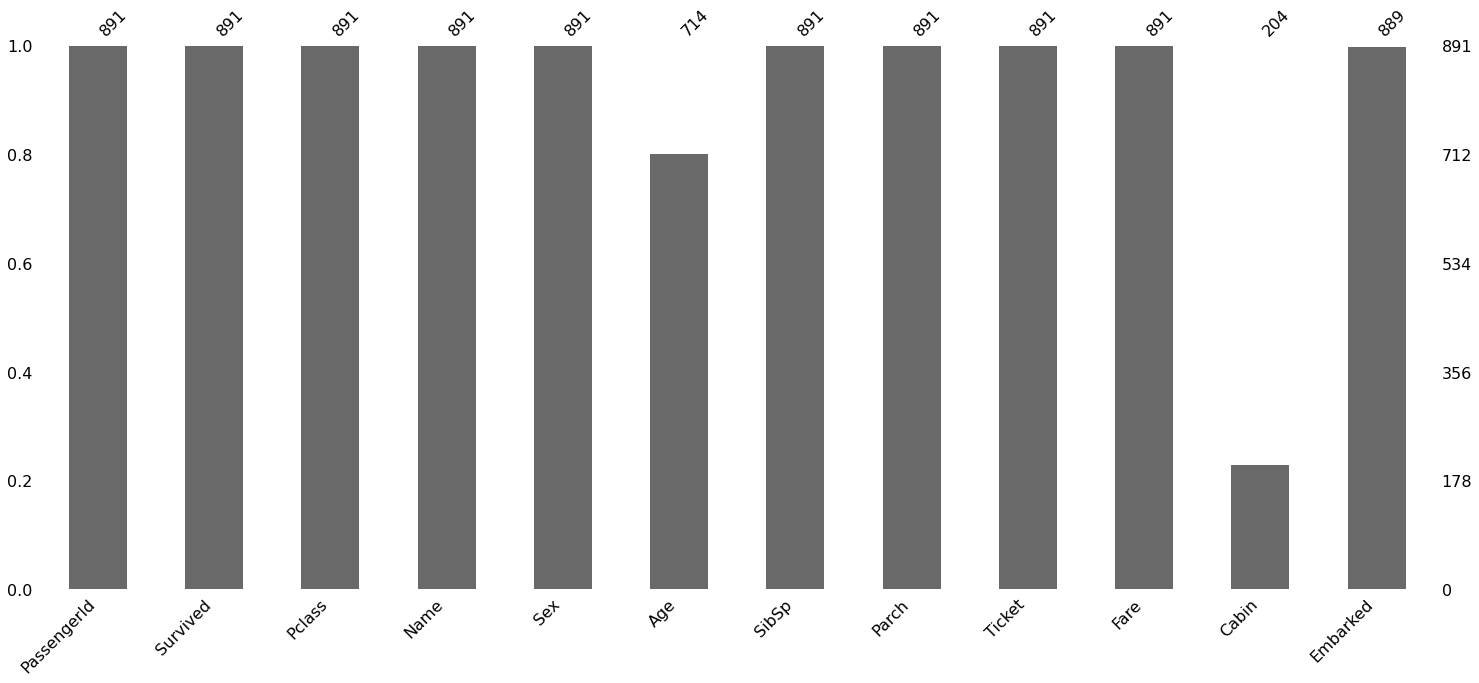

In [ ]:
# 결측치 확인

import missingno as msno 

msno.bar(train)  # 결측치 갯수 확인

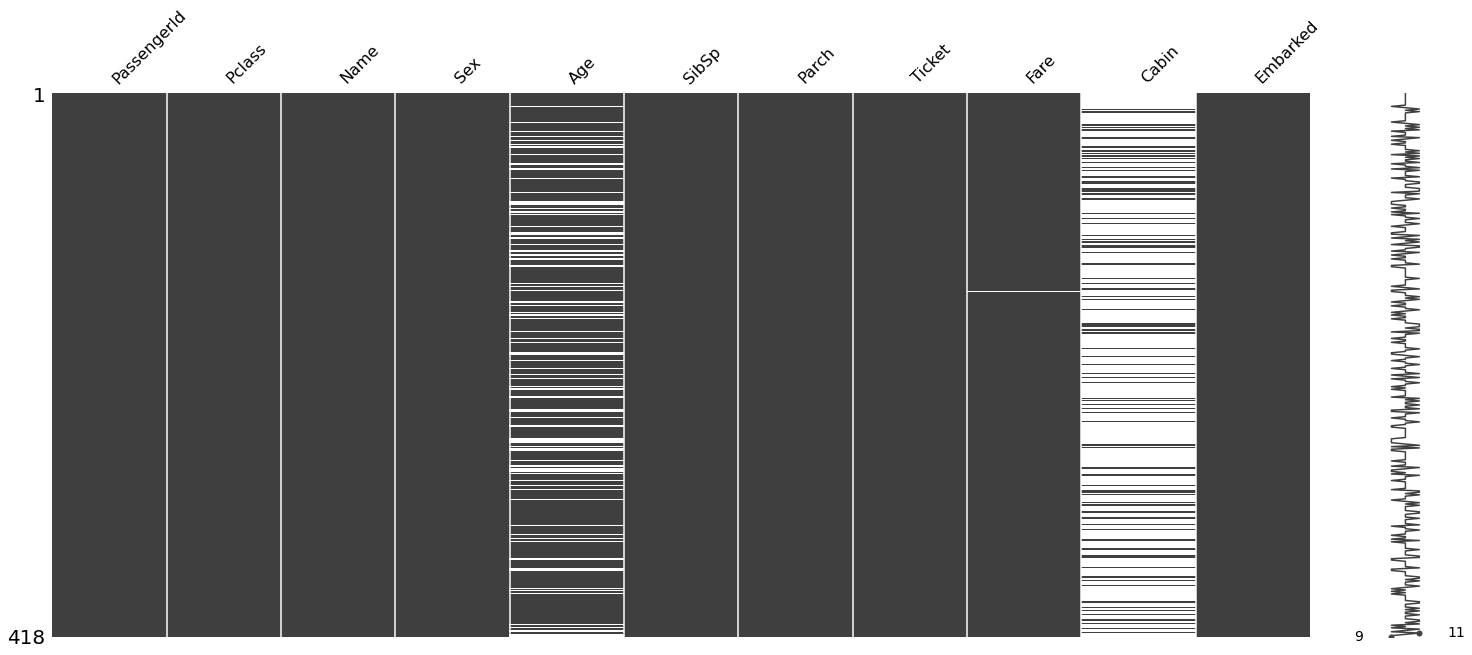

In [ ]:
msno.matrix(test)  # 결측치 분포 확인

In [ ]:
# 상관 관계 분석

train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


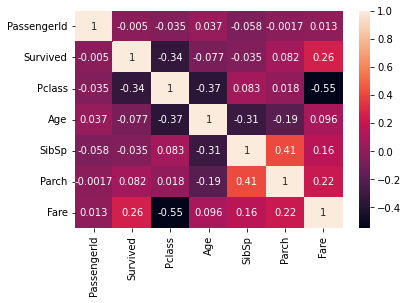

In [ ]:
# sns 로 그림으로 표현
sns.heatmap(data=train.corr(), annot=True) 

In [ ]:
# 3. 데이터 전처리 - 결측치/이상치 처리, 자료형 변환, 속성을 추가 생성 

# 데이터 결합 (위 아래 방향으로 결합)

# 분석을 끝내고 학습을 시킬때 다시 분리 하기 편하도록 split  열을 만들어 각각 이름을 부여한다. 
train['Split'] = 'Train'
test['Split'] = 'Test'

data = pd.concat([train, test], axis=0)

data.shape

(1309, 13)

In [ ]:
data_num = data.loc[:,['Pclass','Age','SibSp','Parch','Fare','Survived']]
data_num

,Pclass,Age,SibSp,Parch,Fare,Survived
0,3,22.0,1,0,7.2500,0.0
1,1,38.0,1,0,71.2833,1.0
2,3,26.0,0,0,7.9250,1.0
3,1,35.0,1,0,53.1000,1.0
4,3,35.0,0,0,8.0500,0.0
...,...,...,...,...,...,...
413,3,NaN,0,0,8.0500,NaN
414,1,39.0,0,0,108.9000,NaN
415,3,38.5,0,0,7.2500,NaN
416,3,NaN,0,0,8.0500,NaN


In [ ]:
# 결측치 처리 - 0, 삭제, 평균, 최빈

# age  평균
data_num['Age'] = data_num['Age'].fillna(data_num['Age'].mean())

# fare 최빈
data_num['Fare'] = data_num['Fare'].fillna(data_num['Fare'].mode()[0])


In [ ]:
data_num

,Pclass,Age,SibSp,Parch,Fare,Survived
0,3,22.000000,1,0,7.2500,0.0
1,1,38.000000,1,0,71.2833,1.0
2,3,26.000000,0,0,7.9250,1.0
3,1,35.000000,1,0,53.1000,1.0
4,3,35.000000,0,0,8.0500,0.0
...,...,...,...,...,...,...
413,3,29.881138,0,0,8.0500,NaN
414,1,39.000000,0,0,108.9000,NaN
415,3,38.500000,0,0,7.2500,NaN
416,3,29.881138,0,0,8.0500,NaN


In [ ]:
# 문제지와 답안지로 분리

selected_features = ['Pclass','Age','SibSp','Parch','Fare']

X_train = data_num.loc[data['Split']=='Train', selected_features]  #훈련용 문제지
y_train = data_num.loc[data['Split']=='Train','Survived']          #훈련용 답안지

X_test = data_num.loc[data['Split']=='Test', selected_features]    #검증용 문제지


In [ ]:

# 훈련용 80% - 검증용 20% 으로 분할

from sklearn.model_selection import train_test_split

X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, 
                                            test_size = 0.2,
                                            shuffle = True,
                                            random_state = 20)

In [ ]:
# 원하는 알고리즘으로 분석 코드, 결과

# by 장서영
# 앙상블 모델 ensemble model - Boosting 

############### 4. 모델 학습 
from xgboost import XGBClassifier       # XGB 모듈 읽어오기
xgbc = XGBClassifier(n_estimators=80, max_depth=100, random_state=10)     
                                  # xgbc 객체 생성하기, n_estimators = 나무의 개수, max_depth = 각 나무의 길이  
xgbc.fit(X_tr, y_tr)              # 훈련용 데이터셋과 훈련용 결과로 학습하여 모델 생성 

# 예측 (결과)

xgbc_pred = xgbc.predict(X_val)   # 검증용 데이터셋만 제시, y_test 결과는 미제공 
xgbc_pred                         # 생성한 모델로 예측한 결과
# 평가
from sklearn.metrics import accuracy_score            # 평가 모듈 읽어오기 
accuracy_score(y_val, xgbc_pred)

# 0.6703910614525139





In [ ]:
# 앙상블 모델 ensemble model - Boosting 
# by 장서영
############### 4. 모델 학습 
from xgboost import XGBClassifier                             # XGB 모듈 읽어오기
xgbc = XGBClassifier(n_estimators=30, max_depth=200, random_state=20)     
                                  # xgbc 객체 생성하기, n_estimators = 나무의 개수, max_depth = 각 나무의 길이  
xgbc.fit(X_tr, y_tr)         # 훈련용 데이터셋과 훈련용 결과로 학습하여 모델 생성 

# 예측 (결과)

xgbc_pred = xgbc.predict(X_val)   # 검증용 데이터셋만 제시, y_test 결과는 미제공 
xgbc_pred                         # 생성한 모델로 예측한 결과
# 평가
from sklearn.metrics import accuracy_score            # 평가 모듈 읽어오기 
accuracy_score(y_val, xgbc_pred)


# 0.6927374301675978 


In [ ]:
# by 장서영

from sklearn.tree import DecisionTreeClassifier                 # DT 모듈 읽어오기
dtc = DecisionTreeClassifier(max_depth=3, random_state = 10)    # dtc 객체 생성하기 
dtc.fit(X_tr, y_tr)                                       # 훈련용 데이터셋과 훈련용 결과로 학습하여 모델 생성 

# 예측 (결과)

dtc_pred = dtc.predict(X_val)   # 검증용 데이터셋만 제시, y_test 결과는 미제공 
dtc_pred                         # 생성한 모델로 예측한 결과

# 평가
from sklearn.metrics import accuracy_score            # 평가 모듈 읽어오기 
accuracy_score(y_val, dtc_pred)

# 0.7206703910614525


0.7206703910614525

In [ ]:
# 유정화님

# voting

from sklearn.ensemble import VotingClassifier as Vot              
from sklearn.tree import DecisionTreeClassifier as DT          
from sklearn.svm import SVC                        
from sklearn.neighbors import KNeighborsClassifier as KN      

knn = KN(n_neighbors=10)                                            
knn.fit(X_tr, y_tr)                                      

svc = SVC(kernel='rbf')                                        
svc.fit(X_tr, y_tr)                                         

dtc = DT(max_depth = 10, random_state = 10)                  
dtc.fit(X_tr, y_tr)                                         


evc = Vot(estimators=[('KNN',knn),('SVM',svc),('DT',dtc)],        
          voting='hard')                                        
evc.fit(X_tr, y_tr)                                        

# 예측 (시험)
evc_pred = evc.predict(X_val)           
evc_pred 

# 평가
from sklearn.metrics import accuracy_score  
accuracy_score(y_val, evc_pred)


0.6927374301675978

In [ ]:
# 피처 엔지니어링

# 피처값들을 가공하여 모델의 성능을 개선할수 있는 여러 방법들을 고민해보자. 

train['Survived'].value_counts()   # 0 사망자  1 생존자

0    549
1    342
Name: Survived, dtype: int64

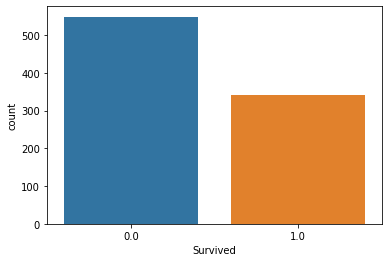

In [ ]:
sns.countplot(x='Survived', data=data[data['Split']=='Train'])

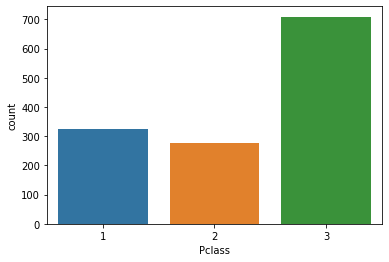

In [ ]:
# Pclass : 객실 등급

sns.countplot(x='Pclass', data=data)

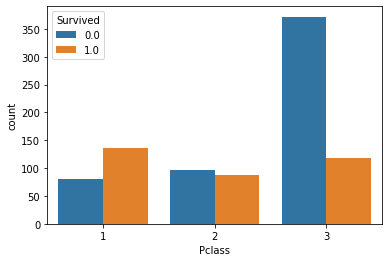

In [ ]:
sns.countplot(x='Pclass', hue='Survived', data = data)

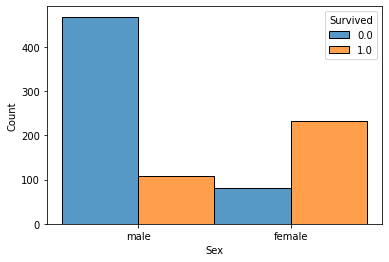

In [ ]:
# 성별 

sns.histplot(x='Sex', hue='Survived', multiple='dodge', data=data[data['Split']=='Train'])

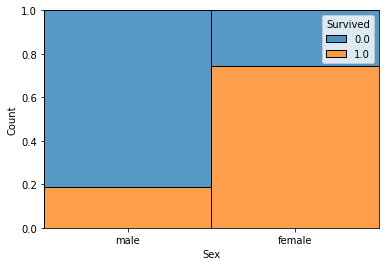

In [ ]:
sns.histplot(x='Sex', hue='Survived', multiple='fill', data=data[data['Split']=='Train'])

In [ ]:
data['Sex']

# 성별의 차이는 생존에 있어 상당히 커다란 요인으로 작용하고 있는 것을 볼 수 있다. 
# 하지만 현재 성별 값은 문자로  male female 로 되어 있어 머신러닝 알고리즘에 넣을 수 없다. 
# 따라서 문자형 데이터 타입을 숫자화 하는 작업이 필요하고 다양한 방법이 존재한다.  

0        male
1      female
2      female
3      female
4        male
        ...  
413      male
414    female
415      male
416      male
417      male
Name: Sex, Length: 1309, dtype: object

In [ ]:
# female 0  male 1

data.loc[data['Sex']=='female','Sex'] = 0
data.loc[data['Sex']=='male','Sex'] = 1

data['Sex']

0      1
1      0
2      0
3      0
4      1
      ..
413    1
414    0
415    1
416    1
417    1
Name: Sex, Length: 1309, dtype: object

In [ ]:
data['Sex'] = data['Sex'].astype(int)
data['Sex']

0      1
1      0
2      0
3      0
4      1
      ..
413    1
414    0
415    1
416    1
417    1
Name: Sex, Length: 1309, dtype: int64

In [ ]:
# Name
data['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
413                                   Spector, Mr. Woolf
414                         Oliva y Ocana, Dona. Fermina
415                         Saether, Mr. Simon Sivertsen
416                                  Ware, Mr. Frederick
417                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

In [ ]:
data['Name'].unique()

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina', ..., 'Saether, Mr. Simon Sivertsen',
       'Ware, Mr. Frederick', 'Peter, Master. Michael J'], dtype=object)

In [ ]:
title_name = data['Name'].str.split(',', expand=True)[1]   # 시리즈 데이터형을 str로 변환하여 자르고 인덱싱

In [ ]:
title_name

0                                  Mr. Owen Harris
1       Mrs. John Bradley (Florence Briggs Thayer)
2                                      Miss. Laina
3               Mrs. Jacques Heath (Lily May Peel)
4                                Mr. William Henry
                          ...                     
413                                      Mr. Woolf
414                                  Dona. Fermina
415                            Mr. Simon Sivertsen
416                                  Mr. Frederick
417                              Master. Michael J
Name: 1, Length: 1309, dtype: object

In [ ]:
title = title_name.str.split('.', expand=True)[0]   # 시리즈 데이터형을 str로 변환하여 자르고 인덱싱
title

0           Mr
1          Mrs
2         Miss
3          Mrs
4           Mr
        ...   
413         Mr
414       Dona
415         Mr
416         Mr
417     Master
Name: 0, Length: 1309, dtype: object

In [ ]:
title.value_counts()

 Mr              757
 Miss            260
 Mrs             197
 Master           61
 Rev               8
 Dr                8
 Col               4
 Mlle              2
 Major             2
 Ms                2
 Lady              1
 Sir               1
 Mme               1
 Don               1
 Capt              1
 the Countess      1
 Jonkheer          1
 Dona              1
Name: 0, dtype: int64

In [ ]:
# 비슷한 속성을 가진 타이틀 들을 그룹으로 묶자. 

title = title.replace(['Ms'], 'Miss')  # 평민
title = title.replace(['Mlle','the Countess','Lady','Don','Dona','Mme','Sir','Jonkkheer'],'Noble')  # 귀족
title = title.replace(['Col','Major','Capt'], 'Officer')
title = title.replace(['Dr','Rev'],'Priest')

data['Title'] = np.array(title)


In [ ]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Split,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,Train,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,Train,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Train,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,Train,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,Train,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",1,NaN,0,0,A.5. 3236,8.0500,NaN,S,Test,Mr
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,PC 17758,108.9000,C105,C,Test,Dona
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Test,Mr
416,1308,NaN,3,"Ware, Mr. Frederick",1,NaN,0,0,359309,8.0500,NaN,S,Test,Mr


In [ ]:
data['Title'].value_counts()

 Mr              757
 Miss            260
 Mrs             197
 Master           61
 Rev               8
 Dr                8
 Col               4
 Mlle              2
 Major             2
 Ms                2
 Lady              1
 Sir               1
 Mme               1
 Don               1
 Capt              1
 the Countess      1
 Jonkheer          1
 Dona              1
Name: Title, dtype: int64

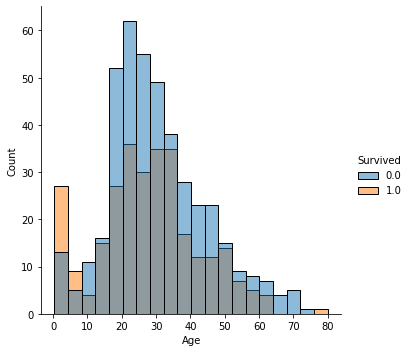

In [ ]:
# Age

sns.displot(x='Age', kind='hist', hue='Survived', data=data[data['Split']=='Train'])

In [ ]:
bins = [0, 4, 8, 12, 16, 32, 36, 48, 56, 64, 100]
labels = ['Infant','Child1','Chind2','Youth1','Youth2','Adult1','Adult2','Middle Aged','Senior','Elderly']

data['AgeBin'] = pd.cut(data['Age'], bins=bins, labels=labels)

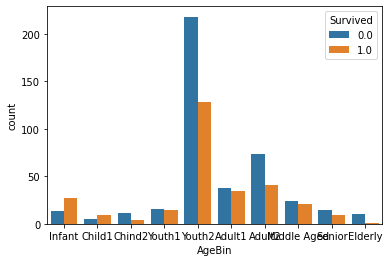

In [ ]:
# 나이 구간별 생존 율 비교

sns.countplot(x='AgeBin', hue='Survived', data=data[data['Split']=='Train'])

In [ ]:
# 새로운 피처 값을 추가하여 정확도 확인

selected_features = ['Pclass','Age','SibSp','Parch','Fare','Sex']

data_num = data.loc[:,['Pclass','Age','SibSp','Parch','Fare','Sex','Survived']]



# age  평균
data_num['Age'] = data_num['Age'].fillna(data_num['Age'].mean())

# fare 최빈
data_num['Fare'] = data_num['Fare'].fillna(data_num['Fare'].mode()[0])




X_train = data_num.loc[data['Split']=='Train', selected_features]  #훈련용 문제지
y_train = data_num.loc[data['Split']=='Train','Survived']          #훈련용 답안지

X_test = data_num.loc[data['Split']=='Test', selected_features]    #검증용 문제지

In [ ]:

# 훈련용 80% - 검증용 20% 으로 분할

from sklearn.model_selection import train_test_split

X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, 
                                            test_size = 0.2,
                                            shuffle = True,
                                            random_state = 20)

In [ ]:
# by 장서영

from sklearn.tree import DecisionTreeClassifier                 # DT 모듈 읽어오기
dtc = DecisionTreeClassifier(max_depth=3, random_state = 10)    # dtc 객체 생성하기 
dtc.fit(X_tr, y_tr)                                       # 훈련용 데이터셋과 훈련용 결과로 학습하여 모델 생성 

# 예측 (결과)

dtc_pred = dtc.predict(X_val)   # 검증용 데이터셋만 제시, y_test 결과는 미제공 
dtc_pred                         # 생성한 모델로 예측한 결과

# 평가
from sklearn.metrics import accuracy_score            # 평가 모듈 읽어오기 
accuracy_score(y_val, dtc_pred)

# 0.7206703910614525


# 성을 수치화하여 추가한 결과 약 10% 의 정확도가 증가한 것을 볼 수 있다. 
# 0.8603351955307262

0.8603351955307262

In [ ]:
data_num

,Pclass,Age,SibSp,Parch,Fare,Sex,AgeBin,Survived
0,3,22.0,1,0,7.2500,1,Youth2,0.0
1,1,38.0,1,0,71.2833,0,Adult2,1.0
2,3,26.0,0,0,7.9250,0,Youth2,1.0
3,1,35.0,1,0,53.1000,0,Adult1,1.0
4,3,35.0,0,0,8.0500,1,Adult1,0.0
...,...,...,...,...,...,...,...,...
413,3,NaN,0,0,8.0500,1,NaN,NaN
414,1,39.0,0,0,108.9000,0,Adult2,NaN
415,3,38.5,0,0,7.2500,1,Adult2,NaN
416,3,NaN,0,0,8.0500,1,NaN,NaN


In [ ]:
# AgeBin

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

data_num = data.loc[:,['Pclass','Age','SibSp','Parch','Fare','Sex','AgeBin','Survived']]

# 문자 데이터를 수치화
data_num['AgeBin'] = encoder.fit_transform(data['AgeBin'])

# age  평균
data_num['Age'] = data_num['Age'].fillna(data_num['Age'].mean())

# fare 최빈
data_num['Fare'] = data_num['Fare'].fillna(data_num['Fare'].mode()[0])


X_train = data_num.loc[data['Split']=='Train', selected_features]  #훈련용 문제지
y_train = data_num.loc[data['Split']=='Train','Survived']          #훈련용 답안지

X_test = data_num.loc[data['Split']=='Test', selected_features]    #검증용 문제지

# 훈련용 80% - 검증용 20% 으로 분할

from sklearn.model_selection import train_test_split

X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, 
                                            test_size = 0.2,
                                            shuffle = True,
                                            random_state = 20)

In [ ]:
data_num

,Pclass,Age,SibSp,Parch,Fare,Sex,AgeBin,Survived
0,3,22.0,1,0,7.2500,1,9,0.0
1,1,38.0,1,0,71.2833,0,1,1.0
2,3,26.0,0,0,7.9250,0,9,1.0
3,1,35.0,1,0,53.1000,0,0,1.0
4,3,35.0,0,0,8.0500,1,0,0.0
...,...,...,...,...,...,...,...,...
413,3,NaN,0,0,8.0500,1,10,NaN
414,1,39.0,0,0,108.9000,0,1,NaN
415,3,38.5,0,0,7.2500,1,1,NaN
416,3,NaN,0,0,8.0500,1,10,NaN


In [ ]:
# by 장서영

from sklearn.tree import DecisionTreeClassifier                 # DT 모듈 읽어오기
dtc = DecisionTreeClassifier(max_depth=3, random_state = 10)    # dtc 객체 생성하기 
dtc.fit(X_tr, y_tr)                                       # 훈련용 데이터셋과 훈련용 결과로 학습하여 모델 생성 

# 예측 (결과)

dtc_pred = dtc.predict(X_val)   # 검증용 데이터셋만 제시, y_test 결과는 미제공 
dtc_pred                         # 생성한 모델로 예측한 결과

# 평가
from sklearn.metrics import accuracy_score            # 평가 모듈 읽어오기 
accuracy_score(y_val, dtc_pred)

# 0.7206703910614525


# 성을 수치화하여 추가한 결과 약 10% 의 정확도가 증가한 것을 볼 수 있다. 
# 0.8603351955307262

0.8603351955307262

In [ ]:
# 문자 데이터를 숫자화 하는 방법
# 1. 0과1로 변환  (종류가 적을경우)
# 2. data_num['AgeBin'] = encoder.fit_transform(data['AgeBin']) (종류가 여러개인 경우) 10개일 경우 1 - 10
# 3. 원핫 인코딩 one hot incoding (종류가 많더라도 균일한 크기로 숫자화 시킬 수 있다.)